In [1]:
#imports
import base64
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from toptica.lasersdk.client import Client, SerialConnection
from toptica.lasersdk.client import UserLevel, Subscription, Timestamp, SubscriptionValue

In [2]:
#check user level
with Client(SerialConnection('COM3')) as client:
    user_level = client.get('ul')
    print ("The Current User Level should be 2 or 3, preferably 2")
    print("Current User Level:", user_level)

The Current User Level should be 2 or 3, preferably 2
Current User Level: 3


In [3]:
#set bias amplitude and offset to zero
with Client(SerialConnection('COM3')) as client:
    client.set('lockin:mod-out-amplitude', 0)
    client.set('lockin:mod-out-offset', 0)
    print ("Bias Amplitude and Offset should read 0")
    print ("Current Bias Amplitude (V):", client.get('lockin:mod-out-amplitude'))
    print ("Current Bias Offset (V):",client.get('lockin:mod-out-offset'))
#wait 5 secs for DLC smart to adjust
time.sleep(5)

Bias Amplitude and Offset should read 0
Current Bias Amplitude (V): 0
Current Bias Offset (V): 0


In [4]:
#turn on lasers
with Client(SerialConnection('COM3')) as client:
    client.set('laser-operation:emission-global-enable', True)
    print ("Lasers should be on (check emission lights). If they fail to power on, check the frontkey and user level")
#wait 5 secs for lasers to adjust
time.sleep(5)

Lasers should be on (check emission lights). If they fail to power on, check the frontkey and user level


In [5]:
#set bias amplitude and offset to default
with Client(SerialConnection('COM3')) as client:
    client.set('lockin:mod-out-amplitude', 0.80)
    client.set('lockin:mod-out-offset', -0.30)
#set bias frequency to 1000
    client.set('lockin:frequency', 1000)
    print ("Bias Amplitude should read 0.8, Bias Offset should read -0.3, Bias Frequency should read 1000")
    print ("Current Bias Amplitude (V):", client.get('lockin:mod-out-amplitude'))
    print ("Current Bias Offset (V):",client.get('lockin:mod-out-offset'))
    print ("Current Bias Frequency (Hz):",client.get('lockin:frequency'))
#wait 5 secs for DLC smart to adjust
time.sleep(5)

Bias Amplitude should read 0.8, Bias Offset should read -0.3, Bias Frequency should read 1000
Current Bias Amplitude (V): 0.800018310546875
Current Bias Offset (V): -0.30002441704309607
Current Bias Frequency (Hz): 1000


In [6]:
#list of frequencies to record data for
frequencies_to_prompt = [
    70, 90, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
    260, 270, 280, 300, 320, 350, 400, 450, 500, 550, 600
]
#empty dataframe
data = {
    'Frequency (GHz)': [],
    'Vlockin (microvolts)': []
}

In [7]:
#DLC smart set f at increments, record displayed voltage from lock-in
for frequency in frequencies_to_prompt:
    with Client(SerialConnection('COM3')) as client:
        #set frequency
        client.set('frequency:frequency-set', frequency)
        #wait 5 secs for lasers to adjust
        time.sleep(5)
        #prompt to enter a value
        entered_value = input(f"Enter a Vlockin (microvolts) value for frequency {frequency} GHz: ")
        #append the frequency and entered value to dataframe
        data['Frequency (GHz)'].append(frequency)
        data['Vlockin (microvolts)'].append(float(entered_value))
#convert dict to dataframe
df = pd.DataFrame(data)

Enter a Vlockin (microvolts) value for frequency 70 GHz:  1.514
Enter a Vlockin (microvolts) value for frequency 90 GHz:  0.507
Enter a Vlockin (microvolts) value for frequency 110 GHz:  0.153
Enter a Vlockin (microvolts) value for frequency 120 GHz:  13.500
Enter a Vlockin (microvolts) value for frequency 130 GHz:  38.35
Enter a Vlockin (microvolts) value for frequency 140 GHz:  127.60
Enter a Vlockin (microvolts) value for frequency 150 GHz:  23.47
Enter a Vlockin (microvolts) value for frequency 160 GHz:  31.19
Enter a Vlockin (microvolts) value for frequency 170 GHz:  87.75
Enter a Vlockin (microvolts) value for frequency 180 GHz:  25.18
Enter a Vlockin (microvolts) value for frequency 190 GHz:  41.44
Enter a Vlockin (microvolts) value for frequency 200 GHz:  26.64
Enter a Vlockin (microvolts) value for frequency 210 GHz:  26.31
Enter a Vlockin (microvolts) value for frequency 220 GHz:  19.76
Enter a Vlockin (microvolts) value for frequency 230 GHz:  13.50
Enter a Vlockin (microvol

In [8]:
#save to csv
csv_file = 'f_vs_vlockin_table.csv'
df.to_csv(csv_file, index = False)
print(f"The data has been saved to {csv_file}, previous file may have been overwritten.")
pd.read_csv(csv_file)

The data has been saved to f_vs_vlockin_table.csv, previous file may have been overwritten.


,Frequency (GHz),Vlockin (microvolts)
0,70,1.514
1,90,0.507
2,110,0.153
3,120,13.500
4,130,38.350
5,140,127.600
6,150,23.470
7,160,31.190
8,170,87.750
9,180,25.180


The data has been saved to f_vs_vlockin_scatterplot.png, previous file may have been overwritten.


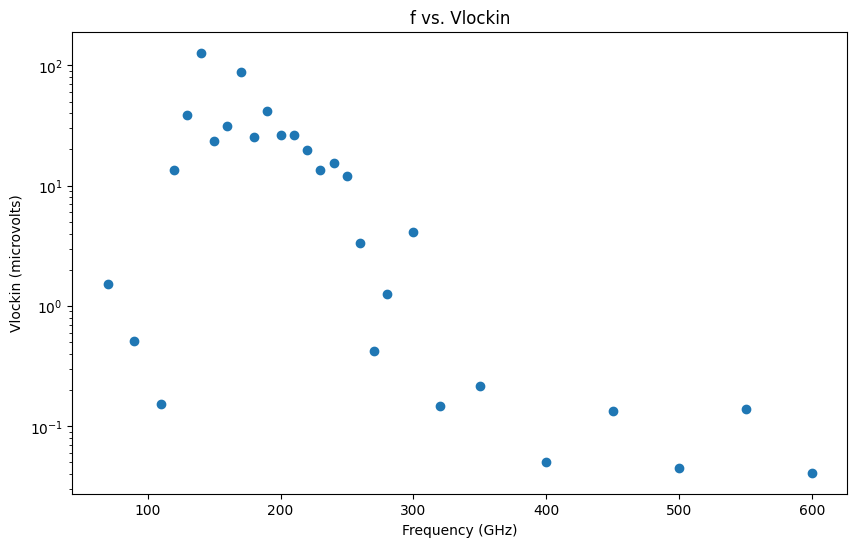

In [9]:
#plot f vs. entered Vlockin on w/ log scale
plt.figure(figsize = (10, 6))
plt.scatter(df['Frequency (GHz)'], df['Vlockin (microvolts)'])
plt.yscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Vlockin (microvolts)')
plt.title('f vs. Vlockin')
#save to png
plot_file = 'f_vs_vlockin_scatterplot.png'
plt.savefig(plot_file)
print(f"The data has been saved to {plot_file}, previous file may have been overwritten.")
#display the plot
plt.show()

In [10]:
#set bias amplitude and offset to zero
with Client(SerialConnection('COM3')) as client:
    client.set('lockin:mod-out-amplitude', 0)
    client.set('lockin:mod-out-offset', 0)
    print ("Bias Amplitude and Offset should read 0")
    print ("Current Bias Amplitude (V):", client.get('lockin:mod-out-amplitude'))
    print ("Current Bias Offset (V):",client.get('lockin:mod-out-offset'))
#wait 5 secs for DLC smart to adjust
time.sleep(5)

Bias Amplitude and Offset should read 0
Current Bias Amplitude (V): 0
Current Bias Offset (V): 0


In [11]:
#turn off lasers
with Client(SerialConnection('COM3')) as client:
    client.set('laser-operation:emission-global-enable', False)
    print ("Lasers should be off (check emission lights).")

Lasers should be off (check emission lights).
